In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from sklearn.model_selection import train_test_split

### Генерация данных

In [2]:
np.random.seed(0)
l = 500
n = 2
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2])
y = np.hstack([[-1]*l, [1]*l])


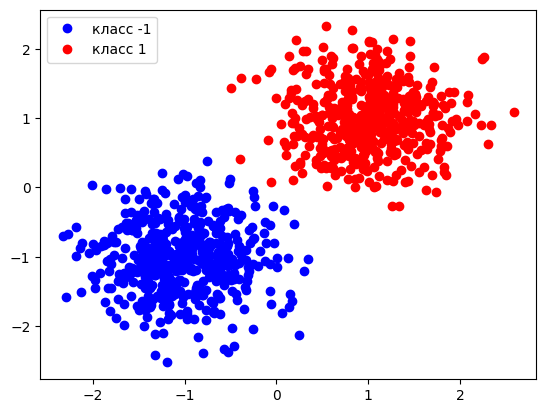

In [3]:
cols = ['blue', 'red']

# построение точек
for k in np.unique(y):
    if k == -1: col = cols[0]
    else: col = cols[1]
    plt.plot(X[y==k,0], X[y==k,1], 'o', label='класс {}'.format(k), color=col)

plt.legend(loc='best')
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

### Метод PLA


\begin{align}
y(x_i) = sign(<w, x_i> + w_0)
\end{align}
Функция потерь
\begin{align}
L_i (w, w_0) = - y_i(<w, x_i> +w_0)
\end{align}

\begin{align}
Q (w,w_0) = \sum_{} {L_i(w, w_0)} = - \sum_{} {y_i(<w, x_i> +w_0)}
\end{align}
Правило обучения: добавить к $w, w_0$ для произвольного $ y_i \ne \hat{y_i}$
$$\left\{\begin{array}{}
  w^{(t+1)} = w^{(t)} + h*y_i* x_i  \\
  w_0^{(t+1)} = w_0^{(t)} + h*y_i\\
  \end{array}
  \right.
$$
где h - темп обучения



In [8]:
class Perceptron:
    def __init__(self, x, y, lr = 1, lamda = 0):
        self.length = len(x)
        self.x = x
        self.y = y
        self.lr = lr
        self.lamda = lamda
        self.w0 = 0
        self.w = np.zeros(len(self.x[0]))

    def predict(self, w, w0, x):
        y_predict = np.dot(x, w) + w0
        if y_predict >= 0: y_predict = 1
        else: y_predict = -1
        return y_predict

    def update(self, y_i, x_i):
        self.w += self.lr*y_i*x_i
        self.w0 += self.lr*y_i

    def train(self, epochs = 100):
        Finish = False
        count = 0
        while not Finish:
            count += 1
            err = 0
            yy = 0
            xx = np.zeros(len(self.x[0]))
            for i in range(self.length):
                x_i = self.x[i]
                y_i = self.y[i]
                # print(y_i, self.predict(self.w, self.w0, x_i), count - epochs)

                if self.predict(self.w, self.w0, x_i)!= y_i :
                    err += 1
                    yy = y_i
                    xx = x_i
            # Update last element
            self.update(yy, xx)

            if err == 0 or count >= epochs: Finish = True
            # print(self.w, self.w0)

        return self.w, self.w0


    def eval(self,X_test, y_test):
        count = 0
        samples = len(y_test)
        y_predict = np.zeros(len(y_test))
        for i in range(len(X_test)):
            x_i = X_test[i]
            y_i = y_test[i]
            y_predict[i] = self.predict(self.w, self.w0, x_i)
            if y_i * y_predict[i] == 1: count += 1
        score = count/samples * 100
        return y_predict, score
    def show_graph(self):
        cols = ['blue', 'red']

        # построение точек
        for k in np.unique(y_train):
            if k == -1: col = cols[0]
            else: col = cols[1]
            plt.plot(X_train[y_train==k,0], X_train[y_train==k,1], 'o', label='класс {}'.format(k), color=col)

        if self.w[1] != 0:
            b = - self.w0/self.w[1]
            k = - self.w[0]/self.w[1]
        else:
            pass
        x_axis = np.linspace(-1, 1)
        y_axis = k* x_axis + b
        plt.plot(x_axis, y_axis, linewidth=2)
        plt.legend(loc='best')
        plt.show()



In [12]:
model = Perceptron(X_train, y_train, lr = 0.5)
model.train(epochs = 1000)

(array([0.56511616, 1.05774768]), 0.0)

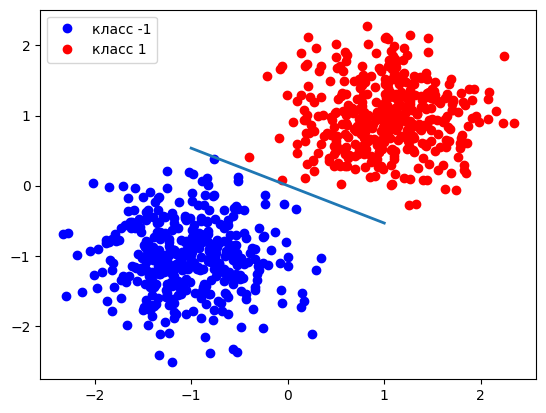

In [13]:
model.show_graph()


In [14]:
_ ,score = model.eval(X_test, y_test)
score

100.0

### SVM

Линейный классификатор
$$ a(w, x) = sign(<w, x> + w_0)$$
$X^l = (x_i, y_i)_{i = 1}^l$ линейно разделима если
существует : $$M_i(w, w_0) = y_i * (<w, x> + w_0) > 0 $$
$min M_i = 1$

Функция потерь
$$ L_i = (1- M_i(w, w_0))_+ =  
\left \{
    \begin{array}{}
    0 & {если} & M_i \ge 1\\
    1- M_i(w,w_0) & {если}& M_i < 1 \\
    \end{array}
    \right.
$$
Разделяющая плоскость для всех x $$ -1 \le (<x, w> + w_0) \le 1 $$
Существуют $$<x_+, w> + w_0 = 1, <x_-, w> + w_0 = -1$$
ширина полосы
$$ \frac{<x_+, x_->}{||w||} = \frac{2}{||w||} => max $$

Наша задача
$$Q = \frac{1}{2} {||w||}^2 + C* \frac{1}{l} \sum_{i = 1}^l L_i = \frac{1}{2} {||w||}^2 + \overline{C}* \sum_{i = 1}^l L_i => min_{w, w_0}$$

Градиент
$$ \frac{dQ}{dw} = w + \overline{C}* \sum_{i = 1}^l \frac{dL_i}{dw} $$
$$ \frac{dQ}{dw_0} = \overline{C}* \sum_{i = 1}^l \frac{dL_i}{dw_0} $$
$$ \frac{dL_i}{dw} =
\left\{
    \begin{array}{}
    0 & {если} & M_i \ge 1\\
     -y_i*x_i & {если}& M_i < 1 \\
    \end{array}
    \right.
$$
$$
\frac{dL_i}{dw_0} = \left\{
\begin{array}{}
0 & {если} & M_i \ge 1\\
-y_i & {если}& M_i < 1 \\
\end{array}
\right.
$$
Градиентный метод
$$w = w + \Delta w = w - h* ∇_w Q = w -h * w + h* y_i*x_i $$
$$w_0 = w_0 + \Delta w_0 = w_0 - h* ∇_{w_0} Q = w_0 + h* y_i $$

In [ ]:
class SVM:
    def __init__(self, lr= 0.001, C = 1, epochs=1000):
        self.lr = lr
        self.C = C
        self.epochs= epochs
        self.w= None
        self.w0 = 0
    def train(self, X, y):
        self.w = np.zeros(len(X[0]))

        for _ in range(self.epochs):
            for i, x_i in enumerate(X):
                condition = y[i] * (np.dot(x_i, self.w) + self.w0) >=1
                if condition:
                    self.w +=  -self.lr * self.w
                else:
                    self.w +=  -self.lr * self.w + self.lr * ( self.C *y[i] * x_i)
                    self.w0 += self.lr *self.C * y[i]
        return self.w, self.w0
    def eval(self,X_test, y_test):
        count = 0
        samples = len(y_test)
        y_predict = np.zeros(len(y_test))
        for i in range(len(X_test)):
            x_i = X_test[i]
            y_i = y_test[i]
            y_predict[i] = np.sign(np.dot(self.w, x_i) + self.w0)
            if y_i * y_predict[i] == 1: count += 1
        score = count/samples * 100
        return y_predict, score


In [ ]:
def visualize_svm(w, w0):
    def get_hyperplane_value(x, w, w0, offset):
        return (-w[0] * x + w0 + offset) / w[1]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    for k in np.unique(y_train):
        if k == -1: col = cols[0]
        else: col = cols[1]
        plt.plot(X_train[y_train==k,0], X_train[y_train==k,1], 'o', label='класс {}'.format(k), color=col)
    # plt.scatter(X_train[:, 0], X_train[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    x1_1 = get_hyperplane_value(x0_1, w, w0, 0)
    x1_2 = get_hyperplane_value(x0_2, w, w0, 0)

    x1_1_m = get_hyperplane_value(x0_1, w, w0, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, w0, -1)

    x1_1_p = get_hyperplane_value(x0_1, w, w0, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, w0, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()




In [ ]:
model= SVM(C= 1000)
w, w0 = model.train(X_train, y_train)
w, w0

(array([2.60517462, 2.72182237]), 0.0)

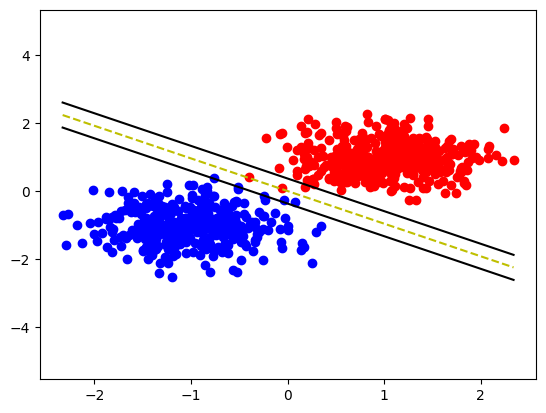

In [ ]:
visualize_svm(w, w0)

In [ ]:
_, score = model.eval(X_test, y_test)
score

100.0